In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
machine_df = pd.read_csv('machine_downtime.csv')

In [3]:
machine_df

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,01-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,01-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure
2497,01-02-2022,Makino-L2-Unit1-2015,Shopfloor-L2,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,NaN,No_Machine_Failure
2498,01-02-2022,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure


In [4]:
machine_df.shape

(2500, 16)

In [5]:
machine_df['Assembly_Line_No'].unique()

array(['Shopfloor-L1', 'Shopfloor-L3', 'Shopfloor-L2'], dtype=object)

In [6]:
machine_df['Machine_ID'].unique()

array(['Makino-L1-Unit1-2013', 'Makino-L3-Unit1-2015',
       'Makino-L2-Unit1-2015'], dtype=object)

In [51]:
#Count the total number of unique machines per assembly line
total_machines_by_line = machine_df.groupby('Assembly_Line_No')['Machine_ID'].nunique().reset_index(name='Unique_Machine_Count')
print(total_machines_by_line)

  Assembly_Line_No  Unique_Machine_Count
0     Shopfloor-L1                     1
1     Shopfloor-L2                     1
2     Shopfloor-L3                     1


## Cleaning Data 

In [22]:
machine_df.isna().sum()/len(machine_df)

Date                           0.0000
Machine_ID                     0.0000
Assembly_Line_No               0.0000
Hydraulic_Pressure(bar)        0.0040
Coolant_Pressure(bar)          0.0076
Air_System_Pressure(bar)       0.0068
Coolant_Temperature            0.0048
Hydraulic_Oil_Temperature      0.0064
Spindle_Bearing_Temperature    0.0028
Spindle_Vibration              0.0044
Tool_Vibration                 0.0044
Spindle_Speed(RPM)             0.0024
Voltage(volts)                 0.0024
Torque(Nm)                     0.0084
Cutting(kN)                    0.0028
Downtime                       0.0000
dtype: float64

We can see that there is a very small percentage of missing values. Generally, if the missing values are less than 5%, we can simply remove them, as they don't have a significant impact on the data. 

In [23]:
machine_df = machine_df.dropna()

## 1. What is the first and last date readings were taken on?

In [11]:
machine_df['Date'].dtypes

dtype('O')

In [12]:
machine_df['Date'] = pd.to_datetime(machine_df['Date'], dayfirst=True)

In [17]:
machine_df['Date']

0      2021-12-31
1      2021-12-31
2      2021-12-31
3      2022-05-31
4      2022-03-31
5      2022-03-31
6      2022-03-31
7      2022-03-31
8      2022-03-31
9      2022-03-31
10     2022-03-31
11     2022-03-31
12     2022-03-31
13     2022-03-31
14     2022-03-31
15     2022-03-31
16     2022-03-31
17     2022-03-31
18     2022-03-31
19     2022-03-31
20     2022-03-31
21     2022-03-31
22     2022-03-31
23     2022-03-31
24     2022-03-31
25     2022-03-31
26     2022-03-31
27     2022-03-31
28     2022-03-31
29     2022-03-31
30     2022-03-31
31     2022-03-31
32     2022-03-31
33     2022-03-31
34     2022-01-31
35     2022-01-31
36     2022-01-31
37     2022-01-31
38     2022-01-31
39     2022-01-31
40     2022-01-31
41     2022-01-31
42     2022-01-31
43     2022-01-31
44     2021-12-30
45     2021-12-30
46     2022-04-30
47     2022-04-30
48     2022-04-30
49     2022-04-30
50     2022-04-30
51     2022-04-30
52     2022-04-30
53     2022-04-30
54     2022-04-30
55     202

In [14]:
machine_df['Date'].min()


Timestamp('2021-11-24 00:00:00')

In [15]:
machine_df['Date'].max()

Timestamp('2022-07-03 00:00:00')

## 2. What is the average Torque?

La feature "Torque (Nm)" représente le couple (ou torque en anglais) généré par la machine, mesuré en Newton-mètres (Nm). Le couple est une force de rotation qui agit autour d'un axe. Cette valeur est cruciale pour évaluer l'efficacité du moteur ou du mécanisme rotatif de la machine, car elle indique la capacité de la machine à effectuer un travail mécanique.

# Calculate the average of Torque for each Machine_ID

In [45]:
# Calculate the average of Torque for each Machine_ID
average_df = machine_df.groupby('Machine_ID')['Torque(Nm)'].mean().reset_index()

In [47]:
# Rename the average column for clarity
average_df.rename(columns={'Torque(Nm)': 'Average_Torque(Nm)'}, inplace=True)
print(average_df)

             Machine_ID  Average_Torque(Nm)
0  Makino-L1-Unit1-2013           24.944080
1  Makino-L2-Unit1-2015           25.117494
2  Makino-L3-Unit1-2015           25.540264


In [48]:
# Calculate the total average of Torque across all machines
total_average_torque = machine_df['Torque(Nm)'].mean()

In [49]:
# Display the result
print(f'Total Average Torque: {total_average_torque}')

Total Average Torque: 25.19696044207056


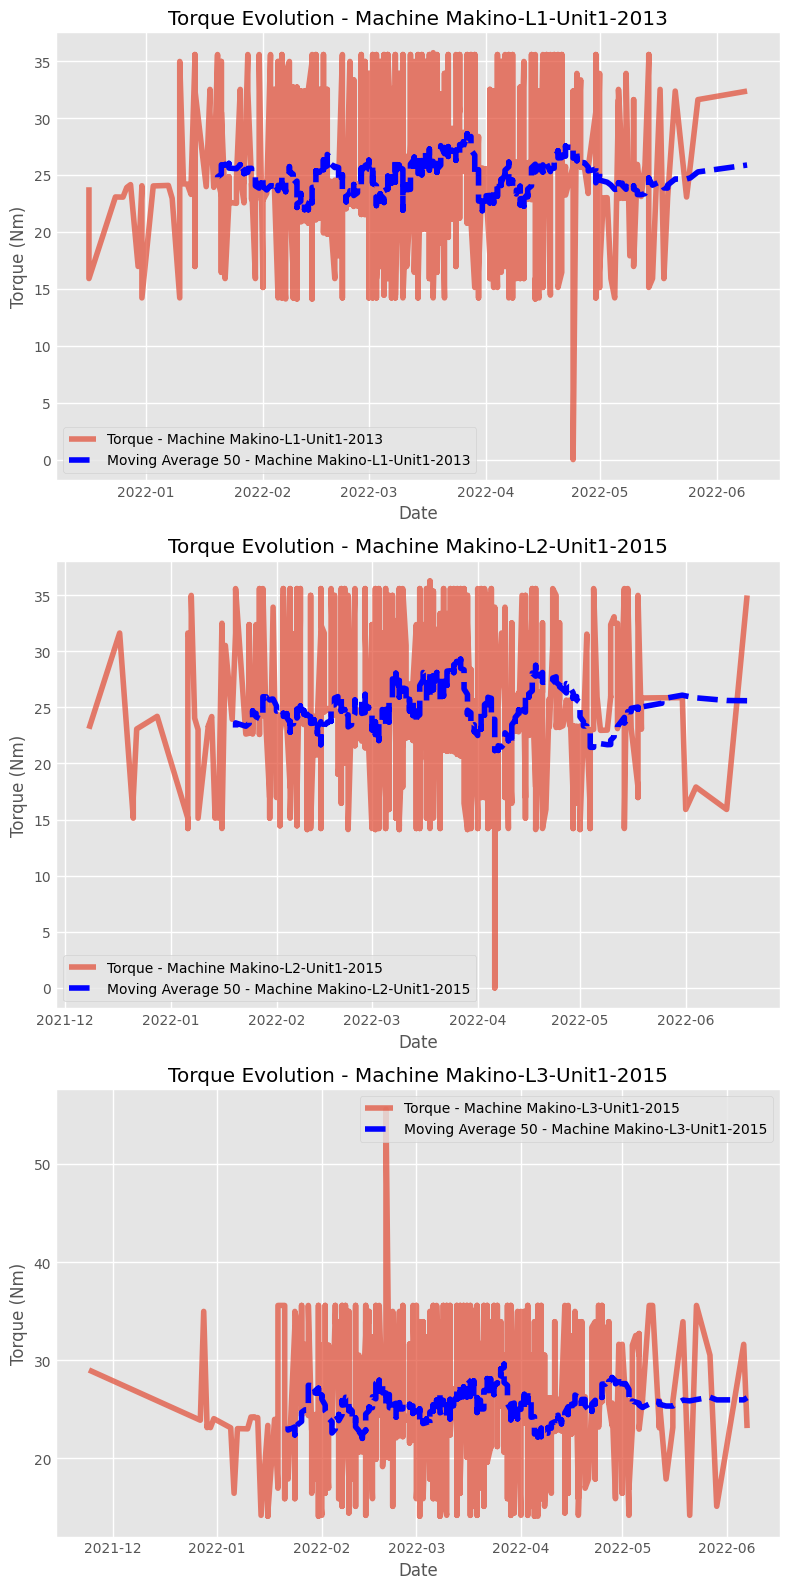

In [58]:
# Sort the dataframe by Machine_ID and Date to ensure temporal order
machine_df = machine_df.sort_values(by=['Machine_ID', 'Date'])

# Get the unique Machine_IDs
unique_machine_ids = machine_df['Machine_ID'].unique()

# Create a figure with 3 subplots (3 rows, 1 column)
fig, axes = plt.subplots(len(unique_machine_ids), 1, figsize=(8, 16))

# Plot the evolution of the Torque for each Machine_ID
for i, machine_id in enumerate(unique_machine_ids):
    # Filter the data for each Machine_ID
    machine_data = machine_df[machine_df['Machine_ID'] == machine_id].copy() 
    
    # Calculate the 30-period moving average
    machine_data.loc[:, 'Torque_MA30'] = machine_data['Torque(Nm)'].rolling(window=30).mean()

    # Plot the evolution of the Torque for this Machine_ID in the corresponding subplot
    axes[i].plot(machine_data['Date'], machine_data['Torque(Nm)'], label=f'Torque - Machine {machine_id}', alpha=0.7)
    axes[i].plot(machine_data['Date'], machine_data['Torque_MA30'], label=f'Moving Average 50 - Machine {machine_id}', color='blue', linestyle='--')
    
    # Add details
    axes[i].set_title(f'Torque Evolution - Machine {machine_id}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Torque (Nm)')
    axes[i].grid(True)
    axes[i].legend()

# Adjust the layout to avoid overlaps
plt.tight_layout()
# Show the graph
plt.show()


As shown above, we can observe the evolution of torque power throughout the dataset. To enhance the visualization and better highlight the trends, I’ve added a 30-point moving average. The moving average smooths the data by calculating the average of the last 30 data points for each observation. This helps to eliminate noise and provides a clearer view of the overall torque trends. 

## Data Summary:
### Calculations:
- **Total Average Torque**: 25.19696044207056

### Interpretation:
- The **Makino-L1-Unit1-2013** machine has an average torque of **24.94 Nm**.
- The **Makino-L2-Unit1-2015** machine has an average torque of **25.12 Nm**.
- The **Makino-L3-Unit1-2015** machine has an average torque of **25.54 Nm**.

### Total Average:
The total average torque across all machines is 25.20 Nm, which suggests that all the machines have similar performance in terms of torque, as their individual averages are close to this value.

## 3. Which assembly line has the highest readings of machine downtime?

In [59]:
machine_df['Downtime'].unique()

array(['Machine_Failure', 'No_Machine_Failure'], dtype=object)

In [62]:
# Comptage du nombre de Machine_Failure et No_Machine_Failure pour chaque Machine_ID
failure_counts = machine_df.groupby(['Machine_ID', 'Downtime']).size().unstack(fill_value=0).reset_index()

# Afficher le DataFrame résultant
print(failure_counts)

Downtime            Machine_ID  Machine_Failure  No_Machine_Failure
0         Makino-L1-Unit1-2013              440                 390
1         Makino-L2-Unit1-2015              382                 381
2         Makino-L3-Unit1-2015              409                 379


To do : voir a quoi correspond les machine Faillure analyser la proportions et voir si c'est possible d'en faire une representation graphique 